# DSC540 - Week 9 and Week 10 Exercises
## Janine Par 


## Exercise 1_ Activity 9: Top 100 ebooks' name extraction from Gutenberg.org

### Import necessary libraries including regex, and beautifulsoup

In [71]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### Ignore SSL errors (this code will be given)

In [72]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Read the HTML from the URL


In [73]:
gutenberg_ul ='https://www.gutenberg.org/browse/scores/top'


### Write a small function to check the status of web request

In [74]:
def status_check(url):
        if url.status_code==200:
            print('Successful Response')
            return 0
        else:
            print('Failure Response')
            return 1           

In [75]:
response=requests.get(gutenberg_ul)
status_check(response)

Successful Response


0

### Decode the response and pass on to `BeautifulSoup` for HTML parsing

In [78]:
contents = response.content.decode(response.encoding)
type(contents)
contents

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n <meta charset="UTF-8"/>\n\n<title>Top 100 | Project Gutenberg</title>\n <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">\n <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">\n <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">\n<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">\n <meta name="viewport" content="width=device-width, initial-scale=1">\n <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>\n <meta name="google-site-verification" content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io"/>\n <meta name="alexaVerifyID" content="4WNaCljsE-A82vP_ih2H_UqXZvM"/>\n <link rel="copyright" href="https://www.gnu.org/copyleft/fdl.html"/>\n <link rel="shortcut icon" href="/gutenberg/favicon.ico?v=1.1"/>\n\n <meta property="og:title"        content="Project Gutenberg" />\n <meta property="og:type"         content="website" />\n <meta property="

In [79]:
soup = BeautifulSoup(contents,'html.parser')


### Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements


In [80]:
# Find all the href tags and store them in the list of links
lis = [ul for ul in soup.findAll('a')]

list_stack=[]

for i,x in enumerate(lis) :
    list_stack.append(x.get("href"))
    

In [81]:
list_stack[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

### Use regular expression to find the numeric digits in these links. <br>These are the file number for the Top 100 books.

In [83]:
#### Initialize empty list to hold the file numbers
file_num=[]

* Using the Regex for all that has pattern of ebooks text followed by / and number
* Loop on the list stack (href list) string.
* Determine if list has the pattern and only do this 100 x (to get top 100 books) 


In [85]:
prog=re.compile(r"ebooks/+[0-9]") # Regex to get ebooks links followed by 100

cntr=0

for i,link in enumerate (list_stack):
    if prog.search(link) !=None:
        cntr=cntr+1
        x=(re.findall('[0-9]+', link))
        if cntr <= 100 and len(x) > 0: 
            file_num.append(int(x[0]))   
    else: 
        next

#### Print the file numbers

In [86]:
# Write your code here
print ("\nThe file numbers for the top 100 ebooks on gutenberg.org \n"+"-"*70)
print(file_num)



The file numbers for the top 100 ebooks on gutenberg.org 
----------------------------------------------------------------------
[1513, 2701, 2641, 145, 100, 37106, 16389, 6593, 67979, 1342, 394, 6761, 2160, 4085, 1259, 1512, 5197, 84, 64317, 11, 20228, 47629, 70788, 844, 98, 174, 345, 2542, 42108, 1952, 5200, 70790, 55, 1400, 1080, 1661, 25344, 76, 43, 28054, 1184, 10676, 4300, 2554, 27827, 1260, 70784, 1232, 35899, 6130, 2600, 70787, 74, 15845, 2591, 120, 1727, 996, 4363, 45, 46, 70791, 514, 768, 30254, 70793, 408, 236, 58585, 2148, 2680, 2852, 13806, 36, 23042, 158, 2500, 67098, 219, 1998, 16, 5740, 3206, 70785, 1399, 244, 35, 1497, 205, 70783, 8800, 24869, 2814, 730, 161, 135, 43453, 132, 33283, 3207, 1513, 2701, 2641, 145, 100, 37106, 16389, 6593, 67979, 1342, 394, 6761, 2160, 4085, 1259, 1512, 5197, 84, 64317, 11, 20228, 47629, 70788, 844, 98, 174, 345, 2542, 42108, 1952, 5200, 70790, 55, 1400, 1080, 1661, 25344, 76, 43, 28054, 1184, 10676, 4300, 2554, 27827, 1260, 70784, 1232, 

### How does the `soup` object's text look like? Use `.text()` method and print only first 2000 characters (i.e. do not print the whole thing, it is long).


In [88]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-18233750
last 7 days1577015
last 30 days7554399



Top 100 EBooks yesterday
T

### Search in the extracted text (using regular expression) from the `soup` object to find the names of top 100 Ebooks (Yesterday's rank)

In [89]:
top_100_lst=[]

#### Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.

In [90]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
start_idx

113

#### Loop 1-100 to add the strings of next 100 lines to this temporary list. 


In [95]:
top_100_lst_temp=[]

for i in range(100):
    #use 10 to remove the other lines that are not Top 100 Ebooks
    top_100_lst_temp.append(soup.text.splitlines()[start_idx+10+i])  

In [96]:
top_100_lst_temp

['Romeo and Juliet by William Shakespeare (3069)',
 'Moby Dick; Or, The Whale by Herman Melville (2754)',
 'A Room with a View by E. M.  Forster (2517)',
 'Middlemarch by George Eliot (2391)',
 'The Complete Works of William Shakespeare by William Shakespeare (2331)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (2313)',
 'The Enchanted April by Elizabeth Von Arnim (2205)',
 'History of Tom Jones, a Foundling by Henry Fielding (2202)',
 'The Blue Castle: a novel by L. M.  Montgomery (2178)',
 'Pride and Prejudice by Jane Austen (2122)',
 'Cranford by Elizabeth Cleghorn Gaskell (2094)',
 'The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett (2087)',
 'The Expedition of Humphry Clinker by T.  Smollett (2062)',
 'The Adventures of Roderick Random by T.  Smollett (2057)',
 'Twenty Years After by Alexandre Dumas (2005)',
 'King Richard II by William Shakespeare (1988)',
 'My Life — Volume 1 by Richard Wagner (1978)',
 'Frankenstein; Or, The Modern Prometheu

#### Use regular expression to extract only text from the name strings and append to an empty list


In [ ]:
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',top_100_lst_temp[i]).span()
    top_100_lst.append(top_100_lst_temp[i][id1:id2])

#### Print the list of titles

In [ ]:
for l in top_100_lst:
    print(l)

## Exercise 2_ Activity 10: Build your own movie database by reading from an API
asdsad


In [63]:
import urllib.request, urllib.parse, urllib.error
import json

In [64]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [65]:
serviceurl='http://www.omdbapi.com/?'
apikey='&apikey='+omdbapi

In [66]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [67]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [68]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [69]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=ce546b70
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,215,822
imdbID: tt0120338
--------------------------------------------------


In [70]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=ce546b70
Error encountered:  Movie not found!


## Exercise 3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

For this exercise, I have used "https://dictionaryapi.com/products/api-collegiate-dictionary"



### Imported needed Libraries


In [26]:
import urllib.request, urllib.parse, urllib.error
import json
import requests

### Load the secret API key from the website after registration

In [4]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    MWDICT = keys['DICTIONARY']

### Define URL format

In [6]:
MWdict_url='https://www.dictionaryapi.com/api/v3/references/collegiate/json/'
apikey='?key='+MWDICT

### Created a function that will use 'get' method from request library and then upon successful connection and retrival, convert the result to JSON format  

In [58]:
def search_word(word):
    json_data=[]
    url = MWdict_url + word+apikey
    print(url)
    r = requests.get(url)
    if r.status_code==200:
        print(f'Retrieving the definition of the word "{word}" now... ')
        contents = r.content.decode(r.encoding)
        json_data=json.loads(contents)
    else:
        print('failed')
    return json_data

### Call the function and pass the needed word to get the Merriam Webster Dictionary information in json format for further processing

In [61]:
MWDict_Json=search_word('Analytics')

https://www.dictionaryapi.com/api/v3/references/collegiate/json/Analytics?key=723fa4c4-ed72-453d-a584-f6aa5c9ed09e
Retrieving the definition of the word "Analytics" now... 


In [62]:
MWDict_Json

[{'meta': {'id': 'analytics',
   'uuid': '93d5da95-e31c-4ce1-a577-7796598cca04',
   'sort': '012590000',
   'src': 'collegiate',
   'section': 'alpha',
   'stems': ['analytics'],
   'offensive': False},
  'hwi': {'hw': 'an*a*lyt*ics',
   'prs': [{'mw': 'ˌa-nə-ˈli-tiks',
     'sound': {'audio': 'analyt05', 'ref': 'c', 'stat': '1'}}]},
  'fl': 'noun',
  'ins': [{'il': 'plural in form but singular or plural in construction'}],
  'def': [{'sseq': [[['sense',
       {'dt': [['text', '{bc}the method of logical {a_link|analysis}']]}]]]}],
  'et': [['text',
    "borrowed from Late Latin {it}Analytica,{/it} title of two of Aristotle's works on logic, borrowed from Greek {it}analytiká,{/it} noun derivative from neuter plural of {it}analytikós{/it} {et_link|analytic|analytic}"]],
  'date': 'circa 1590',
  'shortdef': ['the method of logical analysis']}]

# Exercise 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

* Line
* Scatter
* Bar
* Histogram
* Density Plot
* Pie Chart

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', 800)

In [4]:
df_2016 = pd.read_excel("BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx")
df_2016.shape

(1259, 123)

In [5]:
df_2016.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN


<AxesSubplot:>

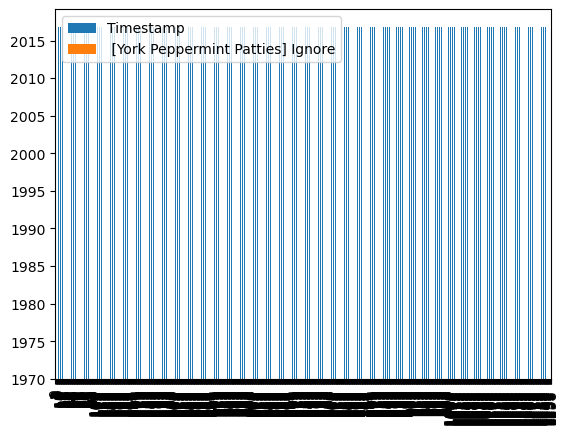